# Why Civil Resistance Works
In this project, the findings of the book [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan are replicated.

The book studies the effectiveness of nonviolent campaigns compared to violent campaigns.

Data are provided at <https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip>. Its documentation can be found at <https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf> in Table WA.7.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as sgr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.collections import LineCollection
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices

%matplotlib inline

### Read Data from Stata

We assume our data is downloaded and unzipped in our local directory, so we use the function read_stata() to create our initial dataframe. With function head() we get a glimpse of what our data looks like.

In [2]:
data = pd.read_stata('Data and Replication Files/WCRWreplication.dta')
data.head()

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.3868,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0


### 1 - Frequency of Nonviolent and Violent Campaign End Years
We want to generate a diagram that shows the amount of violent and non-violent campaigns for each decade. So we create a new dataframe, by selecting only the necessary columns. Then we group by the decade the campaign ended.

In [3]:
data1 = data.loc[:,('eyear','nonviol','viol')]
data1 = data1.groupby((data1.eyear//10)*10).sum()
del data1['eyear']
data1

,nonviol,viol
eyear,,
1900,0,14
1910,1,8
1920,1,18
1930,1,14
1940,5,21
1950,9,19
1960,7,17
1970,7,26
1980,32,13


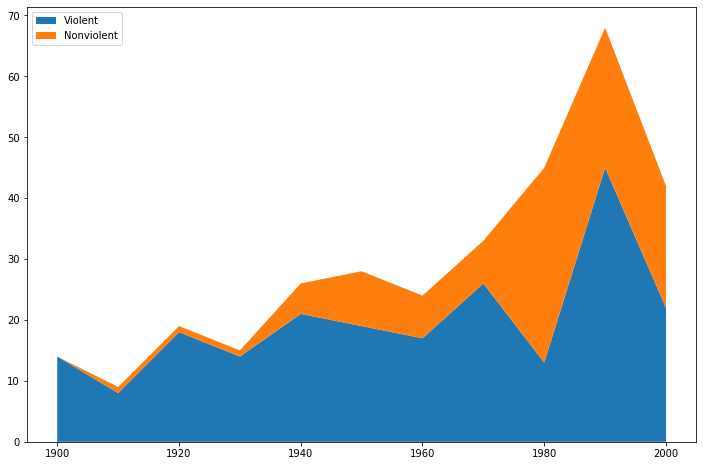

In [4]:
fig = plt.figure(figsize=(12,8))
plt.stackplot(data1.index,[data1.viol , data1.nonviol], labels=['Violent','Nonviolent'])
plt.legend(loc='upper left')
plt.show()

As we can see, both violent and nonviolent campaigns increase through the years. But at first there where little to no peaceful campaings, so they seem increase much faster.

### 2 - Number of Nonviolent Campaigns and Percentage of Success
Now we want to see how succesful these peaceful campaigns have been. So we choose again the necessary columns and group them by decade. We calculate the sum of all nonviolent campaigns and their percentage of success.

In [5]:
data2 = data.loc[data.nonviol == 1,('eyear','success')]
data2 = data2.loc[data2.eyear >= 1940]
succnonviol = data2['success'].groupby((data2.eyear//10)*10).sum()
allnonviol = data2['success'].groupby((data2.eyear//10)*10).count()
succrate_nonviol = succnonviol / allnonviol
succrate_nonviol

eyear
1940    0.400000
1950    0.333333
1960    0.428571
1970    0.571429
1980    0.531250
1990    0.521739
2000    0.700000
Name: success, dtype: float64

These data are then passed in the following barchart. It is obvious that peaceful campaigns not only increase in number, but keep getting more successful through time.

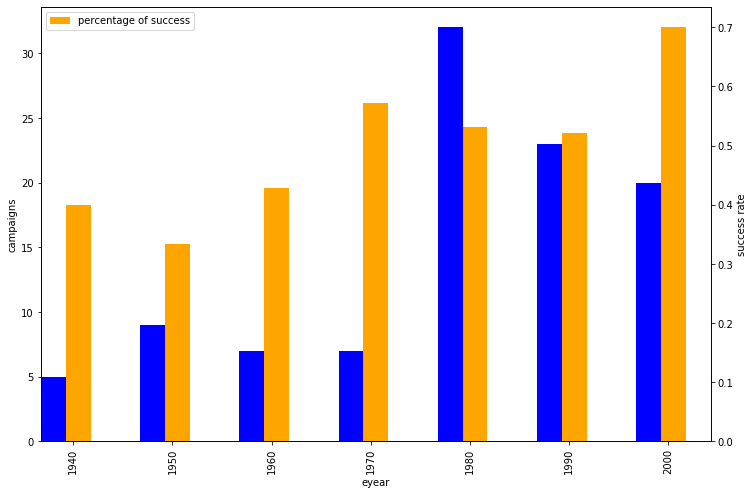

In [6]:
fig = plt.figure(figsize=(12,8)) # Create matplotlib figure

ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.25

allnonviol.plot(kind='bar', color='blue', ax=ax1, width=width, position=1.3,label='number of nonviolent campaigns')
succrate_nonviol.plot(kind='bar', color='orange', ax=ax2, width=width, position=0.3,label='percentage of success')

ax1.set_ylabel('campaigns')
ax2.set_ylabel('success rate')

plt.legend()
plt.show()

### 3 - Success Rate by Decade
The next step is to compare the success of the peaceful campaigns to the success of the violent ones. We calculate the same things we did for the non-violent campaigns before.

In [7]:
data3 = data.loc[data.viol == 1,('eyear','success')]
data3 = data3.loc[data3.eyear >= 1940]
succviol = data3['success'].groupby((data3.eyear//10)*10).sum()
allviol = data3['success'].groupby((data3.eyear//10)*10).count()
succrate_viol = succviol / allviol
succrate_viol

eyear
1940    0.333333
1950    0.368421
1960    0.235294
1970    0.384615
1980    0.384615
1990    0.266667
2000    0.136364
Name: success, dtype: float64

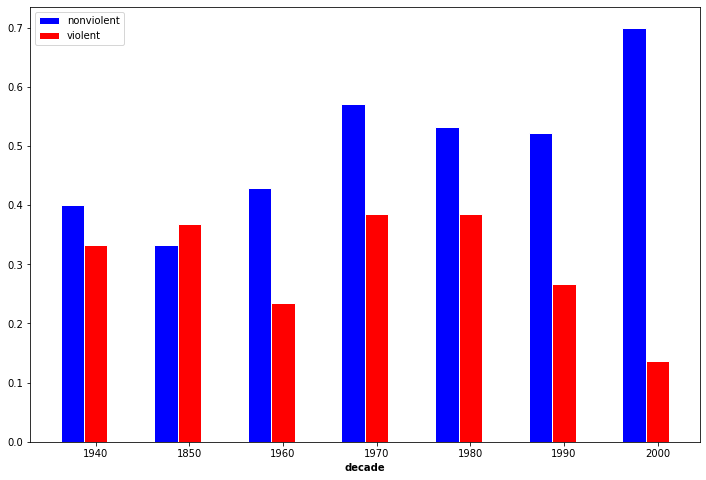

In [8]:
fig = plt.figure(figsize=(12,8))

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(succrate_viol))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, succrate_nonviol, color='blue', width=barWidth, edgecolor='white', label='nonviolent')
plt.bar(r2, succrate_viol, color='red', width=barWidth, edgecolor='white', label='violent')
 
# Add xticks on the middle of the group bars
plt.xlabel('decade', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(succrate_viol))], ['1940', '1850', '1960', '1970', '1980', '1990', '2000'])

# Create legend & Show graphic
plt.legend()
plt.show()

And in the above chart we notice how almost always peaceful campaigns have been a smarter way to achieve a goal.

### 4 - Twenty-Five Largest Resistance Campaigns, 1900-2006
Another interesting aspect of these data is finding out which were the largest campaigns of the century. So we choose the most important columns for the campaigns, such as year, country, location, target etc. We sort them by the highest number of participants they reached. And finally we keep the top 25.

In [9]:
data4 = data.loc[:,('peakmembership','byear','eyear','location','target','viol','success')]
data4 = data4.sort_values(by='peakmembership', ascending=False)
data4 = data4.head(25)
data4.reset_index(inplace = True)
del data4['index']
data4

,peakmembership,byear,eyear,location,target,viol,success
0,4500000.0,1937,1945,China,Japanese occupation,1,0
1,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,1
2,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,1
3,1000000.0,1988,1988,Burma,military junta,0,0
4,1000000.0,1989,1989,China,Communist regime,0,0
5,1000000.0,1967,1968,China,anti-Maoists,1,0
6,1000000.0,1922,1949,China,Kuomintang regime,1,1
7,1000000.0,2006,2006,Mexico,Calderon regime,0,0
8,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
9,1000000.0,1993,1999,Nigeria,Military rule,0,1


As seen above, one of the biggest campaigns happened in Greece in 1963, against the regime of Konstantinos Karamanlis.

### 5 - The Effect of Participation on the Probability of Campaign Success
We continue to examine the effect of high participation to the chance of a campaign to succeed. To find this out, we use logistic regression, with success as independent variable and the logged percentage of the population that took part as dependent variable. At the same time we control for the logged amount of the population at the time. 

In [10]:
from statsmodels.formula.api import logit
particip_mod = logit("success ~ mempc + lnpop", data).fit()
particip_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-12-08 02:02 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

We created our model and made it fit our data. We can notice that the coefficient of mempc (logged population percentage) is 4.4892 which means it has a high impact on the succes of a campaign.

In [11]:
succ_prob = particip_mod.predict()
succ_prob

array([0.61957279, 0.58643815, 0.42994806, 0.14691383, 0.18985849,
       0.38802933, 0.36884643, 0.53791108, 0.16213648, 0.22904883,
       0.62778298, 0.63868491, 0.24704815, 0.09073522, 0.46820505,
       0.62315966, 0.80727978, 0.20306993, 0.29795555, 0.35985261,
       0.72618584, 0.43058488, 0.54162019, 0.28970351, 0.43646642,
       0.51210151, 0.80119534, 0.74705875, 0.39987414, 0.37313019,
       0.36127578, 0.71732258, 0.82008222, 0.24361703, 0.22155509,
       0.62427573, 0.52084536, 0.56011923, 0.36103918, 0.5830031 ,
       0.92701883, 0.8773812 , 0.84764011, 0.6508325 , 0.65010597,
       0.37286524, 0.80083714, 0.40701888, 0.76402031, 0.35064475,
       0.67235692, 0.30674419, 0.4023827 , 0.48552571, 0.37403436,
       0.57244361, 0.5783141 , 0.44668418, 0.37473268, 0.41495932,
       0.11498547, 0.53200595, 0.6348709 , 0.22222089, 0.34890953,
       0.17658923, 0.32851911, 0.22571605, 0.12624966, 0.32984699,
       0.11679193, 0.33074366, 0.55181572, 0.27230962, 0.27832

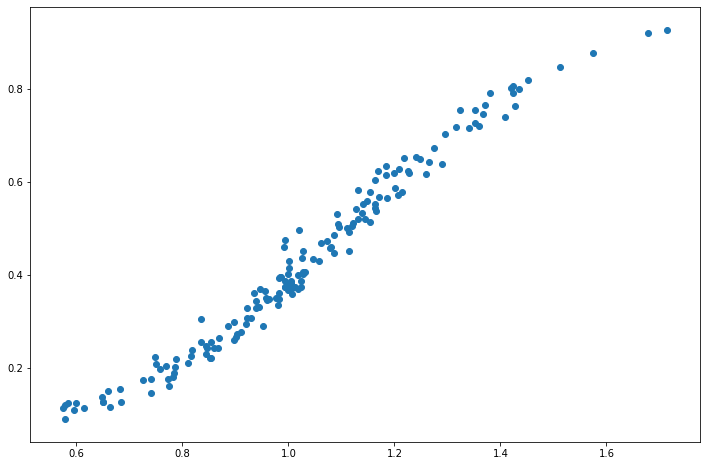

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.scatter(data.mempc.dropna(), succ_prob)

By creating the above plot we have a visual sense of our model and the relationship between the two variables.

### 6 - Nonviolent Resistance, Target Regime Type, Geographical Location
In the last segment of this assignment, we will check if a campaign being nonviolent is still important to its probability to success even if other variables are controlled. First we will do that for the regime and then for the geographical location.

In [13]:
regim_mod = logit("success ~ nonviol + tpolity + lmembers + lnpop", data).fit()
regim_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-12-08 02:02 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
=================================================================

"""

In [14]:
geo_mod = logit("success ~ nonviol + lccode", data).fit()
geo_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.603612
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.065     
Dependent Variable: success          AIC:              395.9336  
Date:               2019-12-08 02:02 BIC:              407.2666  
No. Observations:   323              Log-Likelihood:   -194.97   
Df Model:           2                LL-Null:          -208.47   
Df Residuals:       320              LLR p-value:      1.3696e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.7061    0.2976  -2.3724  0.0177  -1.2894  -0.1228
nonviol        1.2019    0.2509   4.7903  0.0000   0.7101   1.6937
lccode        -0.0008    0.0005  -1.4487  0.1474  -0.0018   0.0003
=================================================================

"""

As seen in the above models, the variable of non-violence keeps having a high coefficient even when other variables are taken into account, 0.9048 when we control for regime and 1.2019 when we control for the geographical location